# Imputing Missing Values

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# CHURN MODELLING DATASET 

df = pd.read_csv('churn_data_st.csv')
df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [4]:
churn_df = df.copy()
churn_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [5]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   ServiceCount      7043 non-null   int64  
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7016 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


In [6]:
churn_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
tenure               0
ServiceCount         0
Contract             0
PaperlessBilling     0
MonthlyCharges       0
TotalCharges        27
Churn                0
dtype: int64

In [7]:
churn_df.shape

(7043, 10)

In [8]:
churn_df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'tenure',
 'ServiceCount',
 'Contract',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [9]:
# CHECKING THE DATA WHICH IS HAVING THE NULL VALUES

churn_df[churn_df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
431,7781-HVGMK,Female,0,72,7,Two year,Yes,65.20,NaN,No
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No
1261,4741-WWJQZ,Female,0,2,4,Month-to-month,Yes,80.15,NaN,No
1287,8800-ZKRFW,Female,0,30,8,Month-to-month,Yes,107.50,NaN,No
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No
1487,5035-PGZXH,Female,0,56,7,One year,Yes,106.80,NaN,No
1846,7369-TRPFD,Male,0,19,7,One year,No,18.80,NaN,No


In [10]:
len(churn_df[churn_df.isna().any(axis=1)])

27

In [11]:
churn_df[churn_df['tenure']==0][['TotalCharges', 'tenure', 'Churn']]

,TotalCharges,tenure,Churn
488,NaN,0,No
753,NaN,0,No
936,NaN,0,No
1082,NaN,0,No
1340,NaN,0,No
3331,NaN,0,No
3826,NaN,0,No
4380,NaN,0,No
5218,NaN,0,No
6670,NaN,0,No


In [12]:
churn_df['TotalCharges'].describe()

count    7016.000000
mean     2282.589168
std      2265.506114
min        18.800000
25%       401.925000
50%      1397.100000
75%      3792.325000
max      8684.800000
Name: TotalCharges, dtype: float64

In [13]:
churn_df[churn_df['Churn']=='No'].describe()

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
count,5174.000000,5174.000000,5174.000000,5174.000000,5147.000000
mean,0.128721,37.569965,5.811751,61.265124,2555.220264
std,0.334923,24.113777,1.890418,31.092648,2328.034938
min,0.000000,0.000000,1.000000,18.250000,18.800000
25%,0.000000,15.000000,4.000000,25.100000,579.200000
50%,0.000000,38.000000,6.000000,64.425000,1685.900000
75%,0.000000,61.000000,7.000000,88.400000,4263.725000
max,1.000000,72.000000,9.000000,118.750000,8672.450000


<AxesSubplot:xlabel='TotalCharges', ylabel='Churn'>

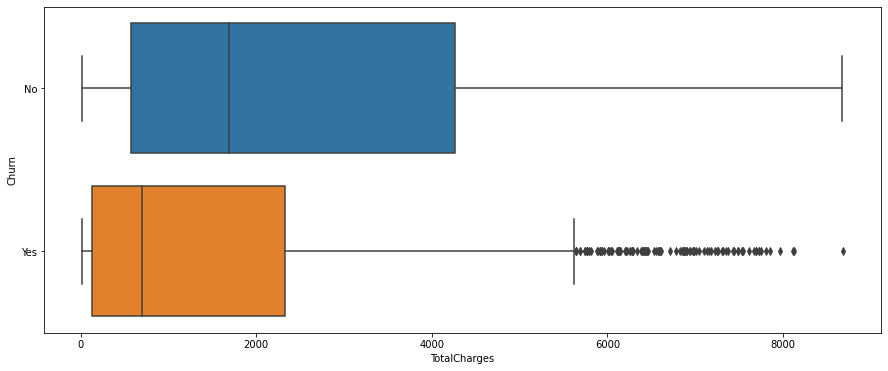

In [17]:
plt.figure(figsize=(15,6))
sns.boxplot(x='TotalCharges', y='Churn', data=churn_df)

d:\anacondafiles\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

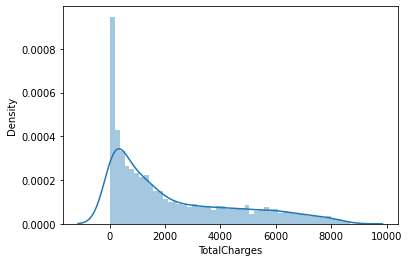

In [32]:
sns.distplot(churn_df['TotalCharges'], bins=50)

**Total Charges is not following a Normal Distribution so lets convert it to a Normal Distribution first !!**

d:\anacondafiles\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

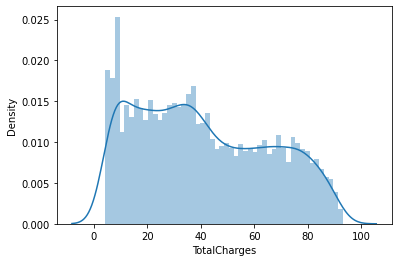

In [33]:
sns.distplot(np.sqrt(churn_df['TotalCharges']), bins=50)

**Check whether can you impute Total Charges column values with the monthly charges column values??**

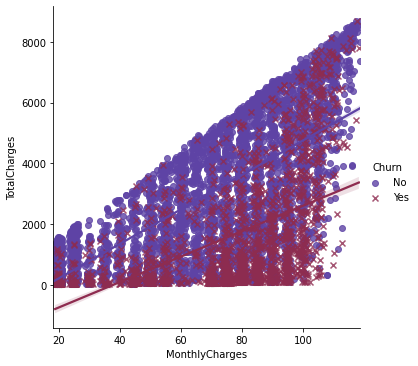

In [35]:
sns.lmplot(x='MonthlyCharges', y='TotalCharges', data=churn_df, fit_reg=True, hue='Churn', markers=['o', 'x'], palette="twilight")

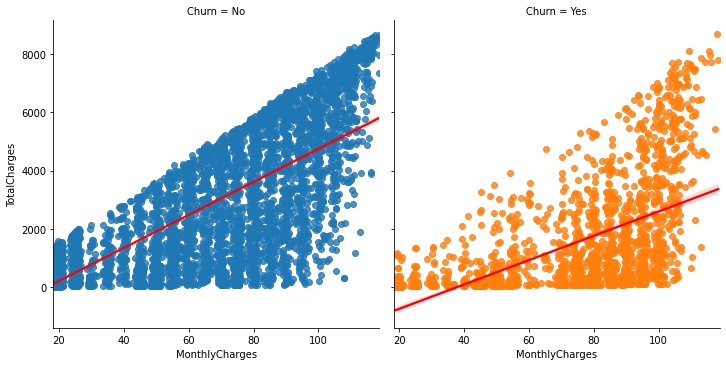

In [66]:
# SPLIT THE SAME VISUAL INTO CHURN YES AND NO SEPARATELY

sns.lmplot(x='MonthlyCharges', y='TotalCharges', data=churn_df, fit_reg=True, col='Churn',hue='Churn', line_kws={'color':'red'})

<AxesSubplot:>

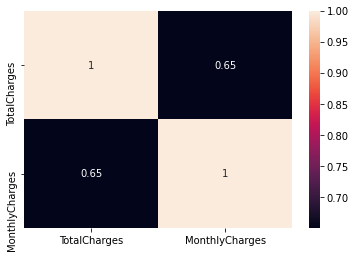

In [39]:
# CORRELATION BEWTWEEN TOTAL CHARGES AND MONTHLY CHARGES

sns.heatmap(churn_df[['TotalCharges', 'MonthlyCharges']].corr(), annot=True)

**But we want to see the correlation only for the Churn = No data because we are not much interested in the NO churn data**

<AxesSubplot:>

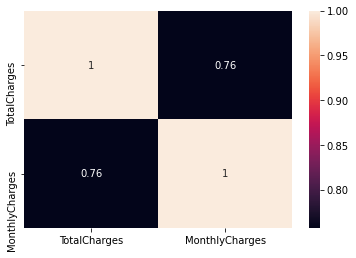

In [43]:
sns.heatmap(churn_df[churn_df['Churn']=='No'][['TotalCharges', 'MonthlyCharges']].corr(), annot=True)

In [45]:
churn_no_df = churn_df[(churn_df['Churn']=='No') & (churn_df['TotalCharges'].isna()==False)]
print('Total data whose Churn is NO and TotalCharges is not null : ', len(churn_no_df))

Total data whose Churn is NO and TotalCharges is not null :  5147


**Since there is a strong positive correlation of 0.76 between the TotalCharges and the MonthlyCharges so lets fit a linear reg model from scipy stats ....What it does is that it calculates the linear least square regression for 2 measurements ie...these 2 provided columns**

In [49]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(churn_no_df['MonthlyCharges'], churn_no_df['TotalCharges'])

In [57]:
print('slope (of the regression line) : ', slope)
print('intercept(where it cuts the y-axis) : ', intercept)
print('r_value (correlation coeff.) : ', r_value)
print('p_value (2 sided p value test) : ', p_value)
print('std_err (Total error of non fitted value) : ', std_err)
print('R-Squared value (proportion of variance in the dependent variable that is predicted in the independent variable ): ', r_value**2)
# HERE THE DEPENDENT VARIABLE IS MONTHLY CHARGES COLUMN

slope (of the regression line) :  56.73637552696061
intercept(where it cuts the y-axis) :  -922.8160085118088
r_value (correlation coeff.) :  0.7573902887184031
p_value (2 sided p value test) :  0.0
std_err (Total error of non fitted value) :  0.681926186783515
R-Squared value (proportion of variance in the dependent variable that is predicted in the independent variable ):  0.573640049444946


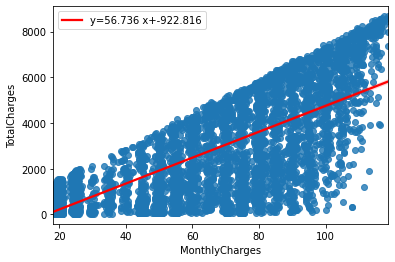

In [64]:
ax = sns.regplot(x='MonthlyCharges', y='TotalCharges', data=churn_no_df, line_kws={'color':'red','label':'y={} x+{}'.format(np.round(slope,3), np.round(intercept,3))})
ax.legend(loc='best')

      HERE IN THIS VARIABLE THE VARIANCE IS LOW AND THE STD ERROR IS HIGH .... SO LETS LOOK FOR ANOTHER VARIABLE WHOSE
      VARIANCE IS HIGH AND THE STD ERROR IS LESS

**Lets Look for Tenure column for imputing the TotalCharges Column Missing Values**

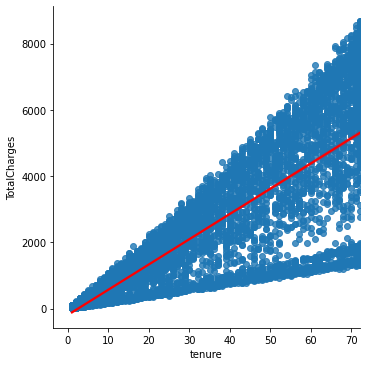

In [76]:
sns.lmplot(x='tenure', y='TotalCharges', data=churn_df, fit_reg=True, line_kws={'color':'red'})
# plt.show()

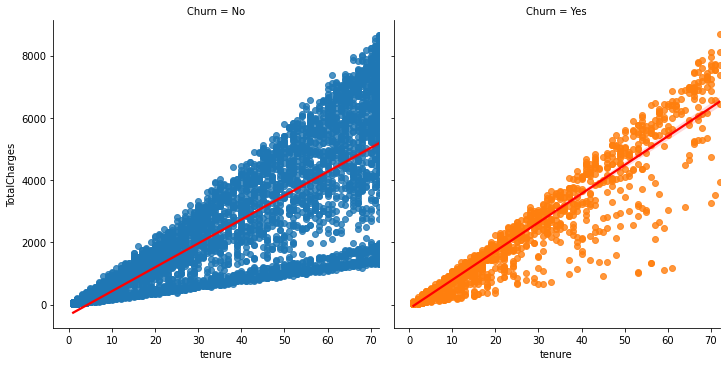

In [67]:
sns.lmplot(x='tenure', y='TotalCharges', data=churn_df, fit_reg=True,col='Churn',hue='Churn', line_kws={'color':'red'})

In [68]:
churn_df[['TotalCharges','tenure']].corr()

,TotalCharges,tenure
TotalCharges,1.000000,0.826066
tenure,0.826066,1.000000


    Correlation is better here than what we saw in the monthly charges column which was 0.76

In [70]:
# CORRELATION WITH ONLY THE "NO" VARIABLE OF THE CHURN

churn_df[churn_df['Churn']=='No'][['TotalCharges','tenure']].corr()

,TotalCharges,tenure
TotalCharges,1.000000,0.793288
tenure,0.793288,1.000000


In [71]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(churn_no_df['tenure'], churn_no_df['TotalCharges'])

In [73]:
print('slope (of the regression line) : ', slope)
print('intercept(where it cuts the y-axis) : ', intercept)
print('r_value (correlation coeff.) : ', r_value)
print('p_value (2 sided p value test) : ', p_value)
print('std_err (Total error of non fitted value) : ', std_err)
print('R-Squared value (proportion of variance in the dependent variable that is predicted in the independent variable ): ', r_value**2)
# HERE THE DEPENDENT VARIABLE IS tenure COLUMN

slope (of the regression line) :  76.74259761920023
intercept(where it cuts the y-axis) :  -334.0856050604698
r_value (correlation coeff.) :  0.7932877280232583
p_value (2 sided p value test) :  0.0
std_err (Total error of non fitted value) :  0.8211475250987226
R-Squared value (proportion of variance in the dependent variable that is predicted in the independent variable ):  0.629305419432303


**with the tenure column though the R-Squared (variance increased) but Std Error here is very very much HIGH!!! which is not good**

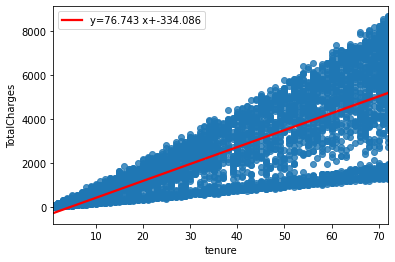

In [77]:
ax = sns.regplot(x='tenure', y='TotalCharges', data=churn_no_df, line_kws={'color':'red','label':'y={} x+{}'.format(np.round(slope,3), np.round(intercept,3))})
ax.legend(loc='best')

**TotalCharges is the combination of both (tenure + MonthlyCharges) so lets use both now to predict the TotalCharges**

In [78]:
churn_no_df['tenure_charges'] = churn_no_df['tenure']*churn_no_df['MonthlyCharges']
churn_no_df.head()


d:\anacondafiles\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,tenure_charges
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No,29.85
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No,1936.30
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No,1903.50
6,1452-KIOVK,Male,0,22,5,Month-to-month,Yes,89.10,1949.40,No,1960.20
7,6713-OKOMC,Female,0,10,2,Month-to-month,No,29.75,301.90,No,297.50


     Now checking the correlation between the new column created and the TotalCharges column

In [80]:
churn_no_df[['tenure_charges','TotalCharges']].corr()

,tenure_charges,TotalCharges
tenure_charges,1.000000,0.999535
TotalCharges,0.999535,1.000000


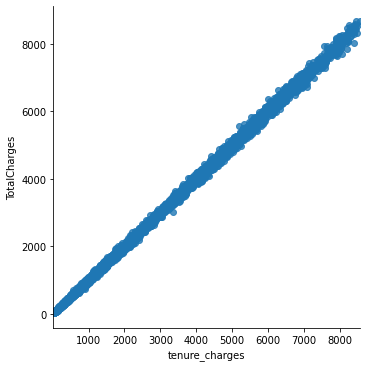

In [81]:
sns.lmplot(x='tenure_charges', y='TotalCharges', data=churn_no_df)

In [84]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(churn_no_df['tenure_charges'], churn_no_df['TotalCharges'])

In [85]:
print('slope (of the regression line) : ', slope)
print('intercept(where it cuts the y-axis) : ', intercept)
print('r_value (correlation coeff.) : ', r_value)
print('p_value (2 sided p value test) : ', p_value)
print('std_err (Total error of non fitted value) : ', std_err)
print('R-Squared value (proportion of variance in the dependent variable that is predicted in the independent variable ): ', r_value**2)
# HERE THE DEPENDENT VARIABLE IS tenure COLUMN

slope (of the regression line) :  1.0001720821518203
intercept(where it cuts the y-axis) :  -0.30109836950350655
r_value (correlation coeff.) :  0.9995350350972922
p_value (2 sided p value test) :  0.0
std_err (Total error of non fitted value) :  0.0004253619242978493
R-Squared value (proportion of variance in the dependent variable that is predicted in the independent variable ):  0.9990702863869453


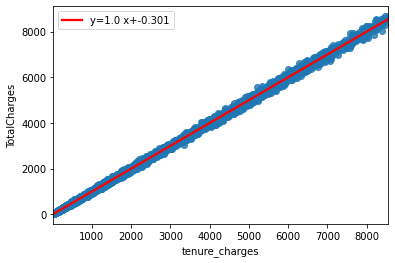

In [86]:
ax = sns.regplot(x='tenure_charges', y='TotalCharges', data=churn_no_df, line_kws={'color':'red','label':'y={} x+{}'.format(np.round(slope,3), np.round(intercept,3))})
ax.legend(loc='best')

In [92]:
def fillna(tenure, monthlycharge):
    if tenure == 0:
        totcharges = monthlycharge
    else:
        totcharges = tenure*monthlycharge
        totcharges = intercept + (totcharges*slope)
    return np.round(totcharges,2)

In [93]:
churn_df['TotalChargesNew'] = churn_df.apply(lambda x:x['TotalCharges'] if not pd.isna(x['TotalCharges']) else fillna(x['tenure'], x['MonthlyCharges']), axis=1)

In [94]:
churn_df

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TotalChargesNew
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No,29.85
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No,1889.50
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes,108.15
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No,1840.75
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes,151.65
...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,24,8,One year,Yes,84.80,1990.50,No,1990.50
7039,2234-XADUH,Female,0,72,7,One year,Yes,103.20,7362.90,No,7362.90
7040,4801-JZAZL,Female,0,11,2,Month-to-month,Yes,29.60,346.45,No,346.45
7041,8361-LTMKD,Male,1,4,3,Month-to-month,Yes,74.40,306.60,Yes,306.60


In [97]:
churn_actual = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_actual.csv')
churn_actual.head()

,customerID,TotChargesAct
0,7590-VHVEG,29.85
1,5575-GNVDE,1889.5
2,3668-QPYBK,108.15
3,7795-CFOCW,1840.75
4,9237-HQITU,151.65


In [98]:
# MERGING THESE 2 NOW

churn_merged = pd.merge(churn_df, churn_actual)
churn_merged[churn_merged.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TotalChargesNew,TotChargesAct
431,7781-HVGMK,Female,0,72,7,Two year,Yes,65.20,NaN,No,4694.91,4784.45
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No,52.55,
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No,20.25,
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No,80.85,
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No,25.75,
1261,4741-WWJQZ,Female,0,2,4,Month-to-month,Yes,80.15,NaN,No,160.03,194.55
1287,8800-ZKRFW,Female,0,30,8,Month-to-month,Yes,107.50,NaN,No,3225.25,3242.5
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No,56.05,
1487,5035-PGZXH,Female,0,56,7,One year,Yes,106.80,NaN,No,5981.53,5914.4
1846,7369-TRPFD,Male,0,19,7,One year,No,18.80,NaN,No,356.96,279.2
